In [147]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import tree
from sklearn import neural_network
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning


simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
<h1 text-align = "right">An introduction to machine learning and AI</h1>
<br>

<h2>Input Image 1</h2>
<img src="Image_1.png" width="250" height="250"/>
<h2>Input Image 2</h2>
<img src="Image_2.png" width="256" height="256"/>

In [148]:
# Converts the rgb values of a colour to an integer
def rgb_to_int(r,g,b):
    
    return (r<<16) + (g<<8) + b

def read_data(filename):
    x = []
    y = []
    back_color = rgb_to_int(255,255,255)
    
    # Accesses an image and retrives its dimensions and pixel data
    image = Image.open(filename)
    width,height = image.size
    pixels = image.load()
 
    # Loops through every pixel adding its coordinate and colour to x and y if it has colour
    for i in range(width):
        for j in range(height):
            r,g,b = pixels[i,j]
            color = rgb_to_int(r,g,b)
            
            if (color != back_color):
                x.append([i,j])
                y.append(color)
    return x,y

width, height = 250, 250

def generate_pixel_coordinates():
    points = []
    for i in range (width):
        for j in range(height):
            points.append([i,j])
            
    return points
    
def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def save_data(pixels, colors, output_filename):
    
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
             pix[pixels[i][0],pixels[i][1]] = getRGBfromI(colors[i])

    im.save(output_filename, "PNG")

<h2>Dataset Creation and Spliting</h2><br>

In [149]:
# Creates datasets for both images
image1, image2 = "Image_1.png", "Image_2.png" #Image 21
X1, y1 = read_data(image1)
X2, y2 = read_data(image2)

# Splits the data set into a training (70%) and test data (30%)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state = 100)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state = 100)

# Predict and generate pixles
coords = generate_pixel_coordinates()

<h2>Decision Tree</h2><br>

In [150]:
# Instantiate and train models using both datasets
clf1 = tree.Dclf = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best")
clf1.fit(X1,y1)

clf2 = tree.Dclf = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best") #entropy
clf2.fit(X2,y2)

clf3 = tree.DecisionTreeClassifier()
clf3 = clf1.fit(X1_train,y1_train)
y1_predicted=clf3.predict(X1_test)

clf4 = tree.DecisionTreeClassifier()
clf4 = clf2.fit(X2_train,y2_train)
y2_predicted = clf4.predict(X2_test)

# Predicts the values of those pixels and saves them as an image
save_data (coords, clf3.predict(coords), "Image_Tree_1.png")
save_data (coords, clf4.predict(coords), "Image_Tree_2.png")

# Calculating accuracy, classification reports and cross validation
score_tree_1 = clf1.score(X1_test, y1_test)
accuracy_tree_1 = accuracy_score(y1_test, y1_predicted)
report_tree_1 = classification_report(y1_test, y1_predicted)

score_tree_2 = clf2.score(X2_test, y2_test)
accuracy_tree_2 = accuracy_score(y2_test, y2_predicted)
report_tree_2 = classification_report(y2_test, y2_predicted)

cross_val_tree_1 = np.mean(cross_val_score(clf3, X1, y1, cv=5))
cross_val_tree_2 = np.mean(cross_val_score(clf4, X2, y2, cv=5))

# Defines parameters for gridsearch
parameters = [{'criterion':['gini','entropy'], 
               'splitter':['best', 'random']}]

# Creates and displays grid searches
clf_grid_1 = GridSearchCV(clf3, parameters)
clf_grid_1.fit(X1_train, y1_train)

clf_grid_2 = GridSearchCV(clf4, parameters)
clf_grid_2.fit(X2_train, y2_train)

display(pd.DataFrame(clf_grid_1.cv_results_))
display(pd.DataFrame(clf_grid_2.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000624,0.000509,0.000194,0.000389,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.970588,0.941176,0.970588,1.000000,0.941176,0.964706,0.022010,1
1,0.000817,0.000417,0.000438,0.000540,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",1.000000,0.941176,0.970588,1.000000,0.911765,0.964706,0.034300,1
2,0.002226,0.003048,0.000200,0.000400,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.941176,1.000000,0.941176,0.941176,0.911765,0.947059,0.028818,3
3,0.002028,0.003089,0.000299,0.000408,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.911765,0.941176,0.970588,0.970588,0.941176,0.947059,0.022010,3


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002741,0.000907,0.000407,0.000498,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.958678,0.983471,0.942149,0.958678,0.966942,0.961983,0.013428,2
1,0.001487,0.000954,0.001693,0.002575,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.950413,0.950413,0.900826,0.966942,0.925620,0.938843,0.023140,4
2,0.002816,0.003120,0.000464,0.000573,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.950413,0.991736,0.933884,0.958678,0.983471,0.963636,0.021296,1
3,0.001885,0.002035,0.001943,0.002418,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.942149,0.991736,0.950413,0.958678,0.950413,0.958678,0.017336,3


<h2>Gaussian Naive Bayes<h2>

In [151]:
# Instantiate and train models using both datasets
clf1 = GaussianNB()
clf1.fit(X1_train, y1_train)
clf2 = GaussianNB()
clf2.fit(X2_train, y2_train)

# Predicts using the test data for each dataset and calculates the accuracy
y1_predicted = clf1.predict(X1_test)
y2_predicted = clf2.predict(X2_test)

# Predicts the values of those pixels and saves them as an image
save_data(coords, clf1.predict(coords), "Image_NB_1.png")
save_data(coords, clf2.predict(coords), "Image_NB_2.png")

# Calculating accuracy, classification reports and cross validation
score_nb_1 = clf1.score(X1_test, y1_test)
accuracy_guassian_1 = accuracy_score(y1_test, y1_predicted)
report_guassian_1 = classification_report(y1_test, y1_predicted)

score_nb_2 = clf2.score(X2_test, y2_test)
accuracy_guassian_2 = accuracy_score(y2_test, y2_predicted)
report_guassian_2 = classification_report(y2_test, y2_predicted)

cross_val_nb_1 = np.mean(cross_val_score(clf1, X1, y1, cv=5))
cross_val_nb_2 = np.mean(cross_val_score(clf2, X2, y2, cv=5))

<h2>Artificial Neural Networks</h2><br>

In [152]:
# Instantiate and train models using both datasets
clf1 = neural_network.MLPClassifier(activation='identity', solver='lbfgs')
clf1.fit(X1_train, y1_train)
clf2 = neural_network.MLPClassifier(activation='identity', solver='lbfgs') #logistic
clf2.fit(X2_train, y2_train)

# Predicts using the test data for each dataset and calculates the accuracy
y1_predicted = clf1.predict(X1_test)
y2_predicted = clf2.predict(X2_test)

# Predicts the values of those pixels and saves them as an image
save_data(coords,clf1.predict(coords),"Image_ANN_1.png")
save_data(coords,clf2.predict(coords),"Image_ANN_2.png")

# Defines parameters for gridsearch
parameters = [{'activation':['relu','logistic', 'tanh','identity'], 
               'solver':['sgd', 'adam','lbfgs']}]

# Claculates and displays the gridsearch
clf_grid_1 = GridSearchCV(clf1, parameters)
clf_grid_1.fit(X1_train, y1_train)

clf_grid_2 = GridSearchCV(clf2, parameters)
clf_grid_2.fit(X2_train, y2_train)

display(pd.DataFrame(clf_grid_1.cv_results_))
display(pd.DataFrame(clf_grid_2.cv_results_))

# Calculating accuracy, classification reports and cross validation
score_ann_1 = clf1.score(X1_test, y1_test)
accuracy_ann_1 = accuracy_score(y1_test, y1_predicted)
report_ann_1 = classification_report(y1_test, y1_predicted)

score_ann_2 = clf2.score(X2_test, y2_test)
accuracy_ann_2 = accuracy_score(y2_test, y2_predicted)
report_ann_2 = classification_report(y2_test, y2_predicted)

cross_val_ann_1 = np.mean(cross_val_score(clf1, X1, y1, cv=5))
cross_val_ann_2 = np.mean(cross_val_score(clf2, X2, y2, cv=5))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056564,0.015368,0.000208,0.000416,relu,sgd,"{'activation': 'relu', 'solver': 'sgd'}",0.558824,0.647059,0.676471,0.764706,0.588235,0.647059,0.072044,11
1,0.213304,0.083616,0.000000,0.000000,relu,adam,"{'activation': 'relu', 'solver': 'adam'}",0.794118,0.794118,0.794118,0.705882,0.735294,0.764706,0.037203,7
2,0.305513,0.030312,0.000000,0.000000,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.970588,0.970588,0.941176,0.970588,0.941176,0.958824,0.014409,2
3,0.259469,0.023344,0.003152,0.006305,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.647059,0.676471,0.764706,0.794118,0.588235,0.694118,0.075789,9
4,0.269138,0.010437,0.000000,0.000000,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.882353,0.882353,0.941176,0.882353,0.794118,0.876471,0.047059,6
5,0.241256,0.047902,0.000201,0.000401,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.882353,0.941176,1.000000,0.970588,0.882353,0.935294,0.047059,4
6,0.256750,0.029588,0.000199,0.000399,tanh,sgd,"{'activation': 'tanh', 'solver': 'sgd'}",0.676471,0.647059,0.794118,0.735294,0.617647,0.694118,0.063355,9
7,0.168730,0.014486,0.000214,0.000429,tanh,adam,"{'activation': 'tanh', 'solver': 'adam'}",0.911765,0.852941,0.941176,0.882353,0.823529,0.882353,0.041595,5
8,0.290661,0.037983,0.000000,0.000000,tanh,lbfgs,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.941176,0.941176,1.000000,0.941176,0.941176,0.952941,0.023529,3
9,0.034381,0.006242,0.000000,0.000000,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.617647,0.588235,0.588235,0.676471,0.382353,0.570588,0.099480,12


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.489836,0.225709,0.000199,0.000399,relu,sgd,"{'activation': 'relu', 'solver': 'sgd'}",0.743802,0.710744,0.710744,0.669421,0.768595,0.720661,0.033631,10
1,0.909040,0.020157,0.000000,0.000000,relu,adam,"{'activation': 'relu', 'solver': 'adam'}",0.851240,0.842975,0.842975,0.785124,0.867769,0.838017,0.027953,6
2,0.670783,0.264152,0.000199,0.000398,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.925620,0.909091,0.867769,0.900826,0.586777,0.838017,0.127026,6
3,0.766398,0.160694,0.001833,0.002255,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.760331,0.702479,0.677686,0.702479,0.760331,0.720661,0.033631,9
4,1.007047,0.027936,0.000400,0.000800,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.917355,0.892562,0.884298,0.876033,0.917355,0.897521,0.017018,3
5,0.843362,0.058042,0.001300,0.002119,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.917355,0.892562,0.842975,0.909091,0.892562,0.890909,0.025819,4
6,0.646376,0.131497,0.001248,0.002496,tanh,sgd,"{'activation': 'tanh', 'solver': 'sgd'}",0.727273,0.685950,0.669421,0.710744,0.735537,0.705785,0.024848,11
7,1.009854,0.156754,0.000707,0.000609,tanh,adam,"{'activation': 'tanh', 'solver': 'adam'}",0.958678,0.942149,0.900826,0.834711,0.909091,0.909091,0.042784,2
8,0.887387,0.037262,0.000192,0.000385,tanh,lbfgs,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.966942,0.909091,0.834711,0.834711,0.859504,0.880992,0.050838,5
9,0.344683,0.078606,0.000000,0.000000,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.710744,0.719008,0.685950,0.719008,0.685950,0.704132,0.015149,12


<h2>Comparison</h2><br>

<p>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<strong>Input Image&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Decision Tree Learning &emsp;&emsp;&emsp;&emsp;Gaussian Naive Bayes &emsp;&emsp;&emsp;&emsp;&ensp;Artificial Nerual Network</strong></p>

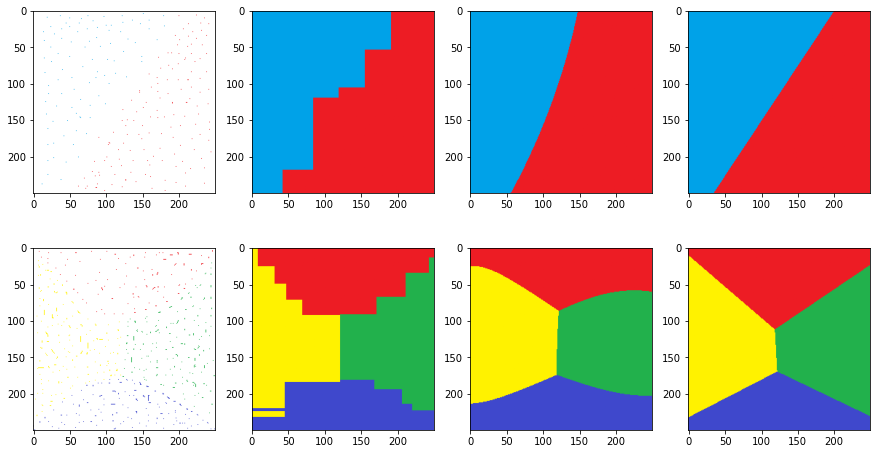

In [153]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 8

img_display_1 = mpimg.imread(image1)
img_tree_1 = mpimg.imread('Image_Tree_1.png')
img_NB_1 = mpimg.imread('Image_NB_1.png')
img_ANN_1 = mpimg.imread('Image_ANN_1.png')
img_display_2 = mpimg.imread(image2)
img_tree_2 = mpimg.imread('Image_Tree_2.png')
img_NB_2 = mpimg.imread('Image_NB_2.png')
img_ANN_2 = mpimg.imread('Image_ANN_2.png')

fig, ax = plt.subplots(2, 4)
ax[0][0].imshow(img_display_1)
ax[0][1].imshow(img_tree_1)
ax[0][2].imshow(img_NB_1)
ax[0][3].imshow(img_ANN_1)
ax[1][0].imshow(img_display_2)
ax[1][1].imshow(img_tree_2)
ax[1][2].imshow(img_NB_2)
ax[1][3].imshow(img_ANN_2)
plt.show()

In [163]:
print("Image 1")
print("\t\t    Decision Tree \t   Gaussian \t\t  Artificial Neural Network")
print("Classifier score 1:", score_tree_1, " , ", score_nb_1, " , ", score_ann_1)
print("Accuracy Image 1:  ", accuracy_tree_1, " , ", accuracy_guassian_1, " , ", accuracy_ann_1)
print("Cross val Image 1: ",cross_val_tree_1, " , ", cross_val_nb_1, " , ", cross_val_ann_1)
print()
print("Image 2")
print("Classifier score 2:", score_tree_2, " , ", score_nb_2, " , ", score_ann_2)
print("Accuracy Image 2:  ", accuracy_tree_2, " , ", accuracy_guassian_2, " , ", accuracy_ann_2)
print("Cross val Image 2: ", cross_val_tree_2, " , ", cross_val_nb_2, " , ", cross_val_ann_2)
print()
print("Image 1")
print(report_tree_1, "\n\n", report_guassian_1, "\n\n", report_ann_1)
print("_______________________________________________________\n")
print("Image 2")
print(report_tree_2, "\n\n", report_guassian_2, "\n\n", report_ann_2)

Image 1
		    Decision Tree 	   Gaussian 		  Artificial Neural Network
Classifier score 1: 0.9864864864864865  ,  0.9864864864864865  ,  1.0
Accuracy Image 1:   0.9864864864864865  ,  0.9864864864864865  ,  1.0
Cross val Image 1:  0.7208333333333333  ,  0.8269557823129252  ,  0.9667517006802722

Image 2
Classifier score 2: 0.9346153846153846  ,  0.9115384615384615  ,  0.9692307692307692
Accuracy Image 2:   0.9346153846153846  ,  0.9115384615384615  ,  0.9692307692307692
Cross val Image 2:  0.6508670520231215  ,  0.7872832369942195  ,  0.8335260115606935

Image 1
              precision    recall  f1-score   support

       41704       1.00      0.96      0.98        27
    15539236       0.98      1.00      0.99        47

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.99        74
weighted avg       0.99      0.99      0.99        74
 

               precision    recall  f1-score   support

       41704       1.00      0.96      0.98   

<h2>Sensitivity study</h2><br>

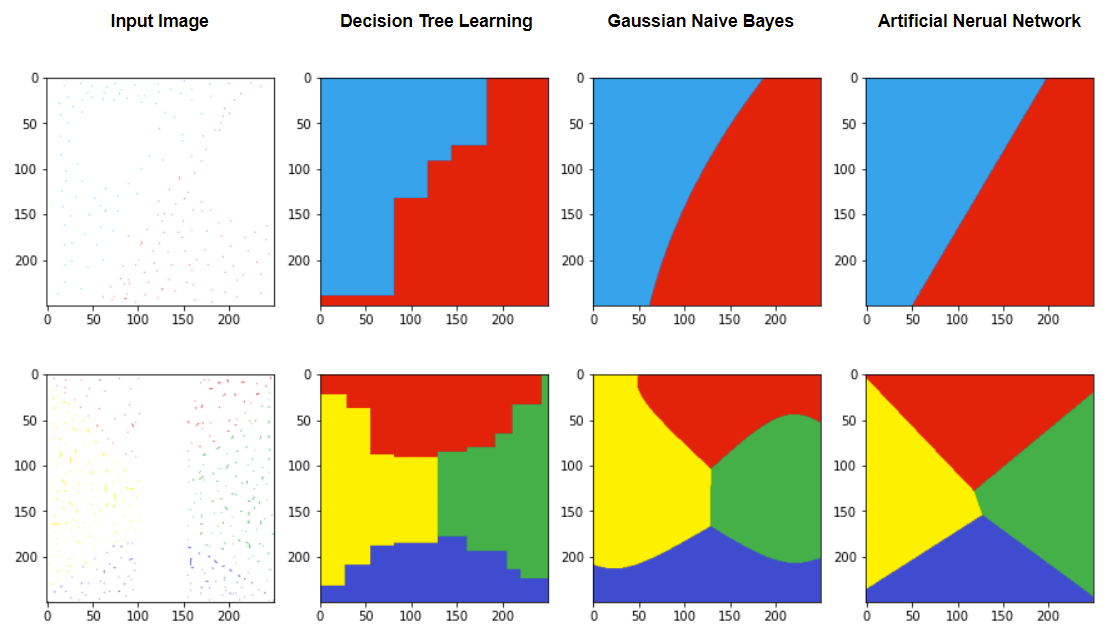

In [155]:
from IPython.display import Image
Image(filename='sensitivity_images.png')

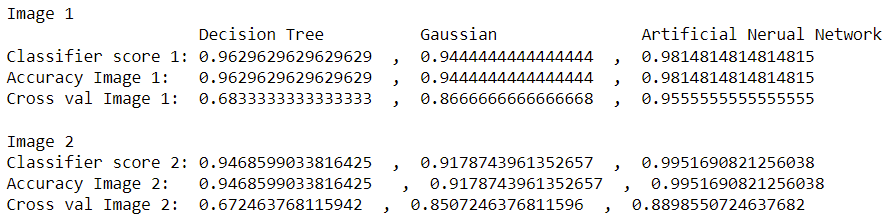

In [156]:
Image(filename='sensitivity_data.png')